# 1. Perkenalan
---

Nama : Venu Fitratama

Batch : FTDS-016-RMT

Dataset : Telco Customer Churn
> `https://www.kaggle.com/datasets/blastchar/telco-customer-churn` 

Objective : Membuat Model Deep Learning - Artificial Neural Network untuk melihat Customer Churn

---
# 2. Import Libraries
---

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings('ignore')

In [79]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

---
# 3. Data Loading
---

In [80]:
#data import
df = pd.read_csv('telco.csv')
#data duplicate
data = df.copy()
#menunjukkan semua data
pd.set_option('display.max_columns', None)

#head dan tail dataset
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
data.shape

(7043, 21)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`TotalCharges` merupakan data bertipe numerikal, namun menurut `TotalCharges` info data merupakan data string, oleh karena itu diperlukan converting dari string ke numerik.

In [83]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [84]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Dataset terdiri atas 7.045 baris dan 21 kolom, tidak terdapat adanya missing values pada data. terdapat 18 kategorikal tipe data dan 3 numerikal tipe data.
- MonthlyCharges, rata-ratanya dalah 64.74 dengan maximum 118.75
- TotalCharges, rata-ratanya dalah 2283.30 dengan maximum 8684.80

---
# 4. Exploratory Data Analysis
---

In [85]:
def pie(data, variable1, variable2):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    data[variable1].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, cmap='Pastel2')
    plt.title(variable1)

    plt.subplot(1, 2, 2)
    data[variable2].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, cmap='Pastel2')
    plt.title(variable2)
    
    plt.show()

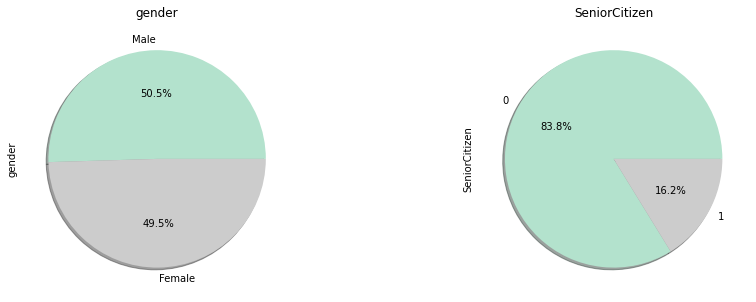

In [86]:
pie(data, 'gender', 'SeniorCitizen')

- Jumlah customer berdasarkan jenis kelamin dapat dikatakan seimbang, dimana persebaran jumlah customer laki-laki sebesar 50.5% dan customer perempuan sebesar 49.5%
- Berdasarkan rentang usia, persebaran jumlah customer dengan label 0 (dibawah 65 tahun) yaitu sebanyak 83.8% dan label 1 (diatas 65 tahun) sebanyak 16.2%

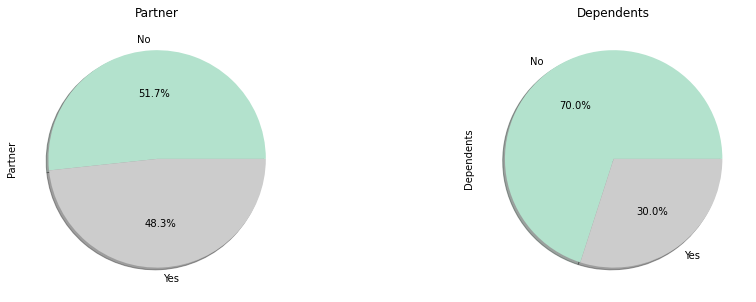

In [87]:
pie(data, 'Partner', 'Dependents')

- Sama seperti jenis kelamin, persebaran dari customer yang mempunyai pasangan/ tidak mempunyai pasangan juga seimbang, dimana customer yang telah memiliki pasangan sebesar 48.3% dan customer yang tidak memiliki pasangan sebesar 51.7%.
- 70% customer belum memiliki tanggungan selain dirinya dan 30% sisanya memiliki tanggungan lain.

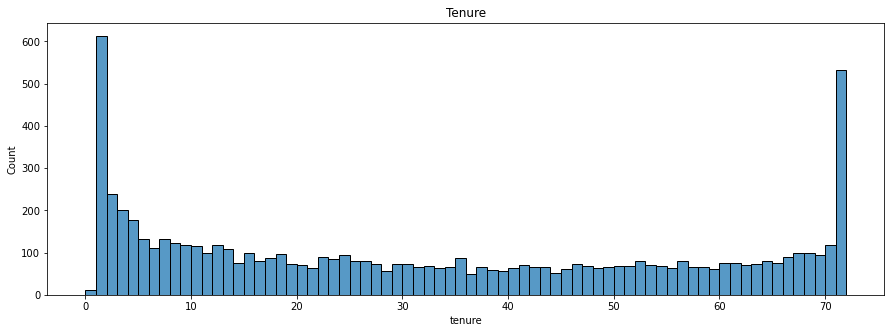

Min : 0
Max : 72


In [88]:
plt.figure(figsize=(15, 5))
sns.histplot(data['tenure'], bins=72)
plt.title('Tenure')
plt.show()

print('Min :', data.tenure.min())
print('Max :', data.tenure.max())

Tenure menunjukan berapa lama customer menggunakan telco dengan rentang waktu per-bulan. dimana jumlah persebaran terbanyak adalah jumlah pengguna baru dengan rentang 0-3 bulan awal dan customer dengan penggunaan 72 bulan.

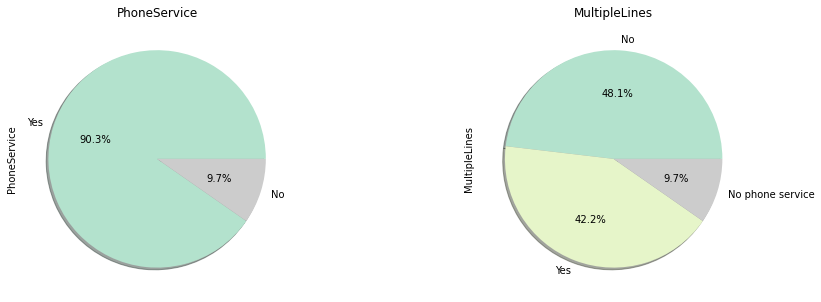

In [89]:
pie(data, 'PhoneService', 'MultipleLines')

- Sebanyak 90.3% customer menggunakan phone service sedangkan 9.7% lainnya tidak
- dari 90.3% yang menggunakan phone service, 48.1% tidak menggunakan lebih dari satu layanan sementara 42.2% lainnya menggunakan lebih dari satu layanan.

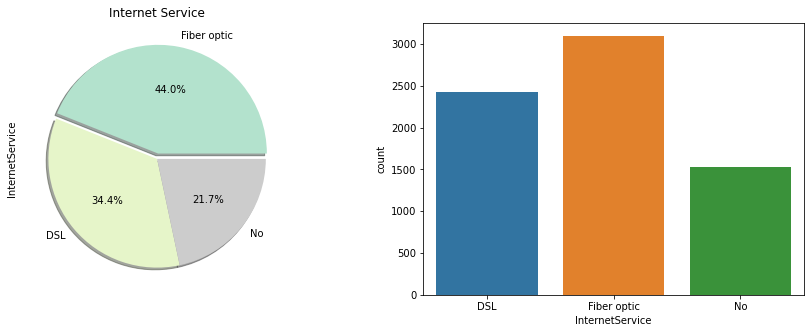

customer yang menggunakan telco       :  5517
customer yang tidak menggunakan telco :  1526


In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Pastel2')
plt.title('Internet Service')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='InternetService')
plt.show()

dsl = data.InternetService.value_counts()['DSL']
fiber = data.InternetService.value_counts()['Fiber optic']
print('customer yang menggunakan telco       : ', dsl+fiber)
print('customer yang tidak menggunakan telco : ',  data.InternetService.value_counts()['No'])

- Diantara customer telco, 44% menggunakan internet service bertipe fiber optic, 24.4% menggunakan tipe DSL dan 21.7% tidak menggunakan layanan internet.
- Sebanyak 5.517 customer menggunakan layanan internet telco dan 1.526 lainnya tidak menggunakan layanan internet telco.

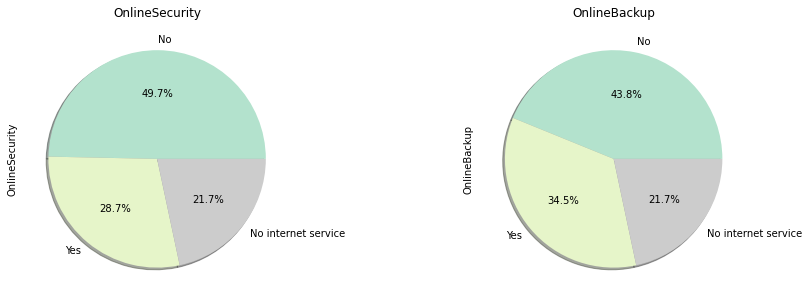

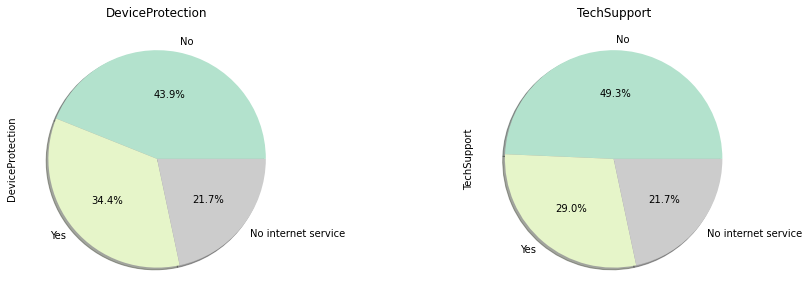

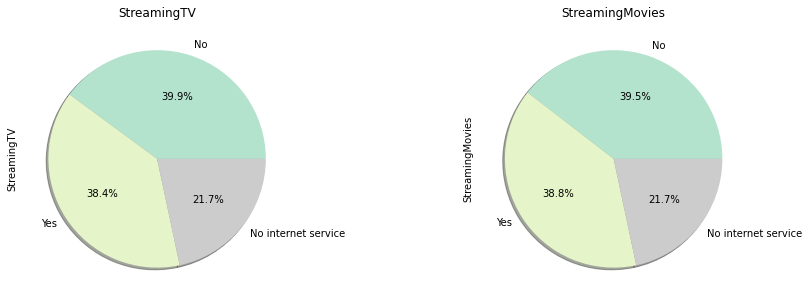

In [91]:
pie(data, 'OnlineSecurity', 'OnlineBackup')
pie(data, 'DeviceProtection', 'TechSupport')
pie(data, 'StreamingTV', 'StreamingMovies')

Dari total 7.043 customer, 78.3% customer yang menggunakan layanan internet Telco, 21.7% tidak menggunakan layanan internet Telco didapat informasi:
- Sebanyak 28.7% customer menggunakan sistem keamanan online sementara 49.7% lainnya tidak menggunakan sistem layanan keamanan online.
- Sebanyak 34.5% customer menggunakan sistem backup online sementara 43.8% lainnya tidak menggunakan sistem layanan backup online.
- Sebanyak 34.4% customer menggunakan proteksi device sementara 43.9% lainnya tidak menggunakan proteksi device.
- Sebanyak 29% customer pernah menggunakan tech support Telco sementara 49.3% lainnya tidak pernah menggunakan tech support Telco.
- Sebanyak 38.4% customer menggunakan layanan streaming TV sementara 39.9% lainnya tidak menggunakan layanan streaming TV.
- Sebanyak 38.8% customer menggunakan layanan streaming movies sementara 39.5% lainnya tidak menggunakan layanan streaming movies.

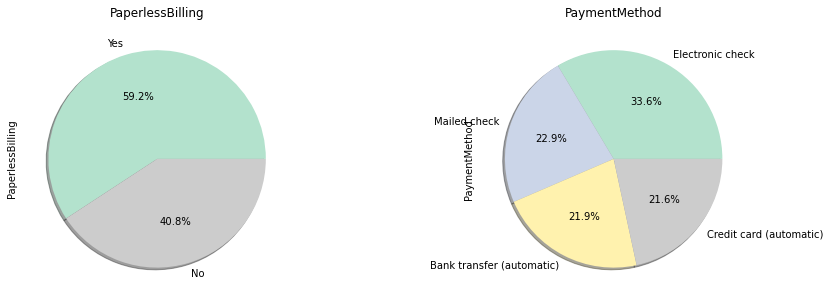

In [92]:
pie(data, 'PaperlessBilling', 'PaymentMethod')

- Sebanyak 59.2% customer memilih menggunakan paperless billing sedangkan 40.8% masih memilih menggunakan tagihan kertas. 
- Dari Payment Method, 33.6% menggunakan electronic check, 22.9% menggunakan mailed check, 21.9% menggunakan transfer bank, dan 21.6% sisanya menggunakan kartu kredit.

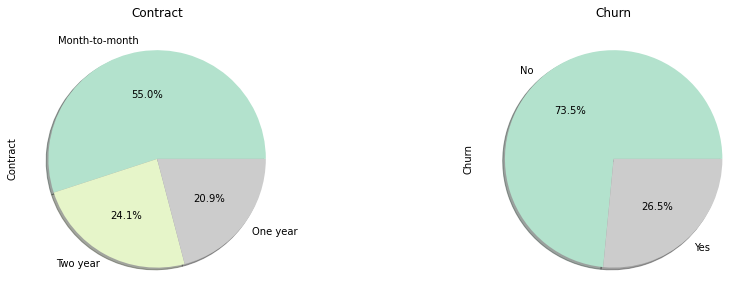

In [93]:
pie(data, 'Contract', 'Churn')

- Dari data karyawan, sebanyak 55% penggunaan telco merupakan kontrak per bulan, 24.1% penggunaan kontrak selama dua tahun dan 20.9% penggunaankontrak selama satu tahun.
- pada label no merupakan pengguna yang tidak memutus kontrak dalam menggunakan layanan telco, sebanyak 73.5% sedangkan 26.5% lainnya memutuskan kontrak dengan telco.
- data pada kolom churn tidak seimbang namun tidak dilakukan data imbalance karena hanya berfokus pada customer yang tidak churn.

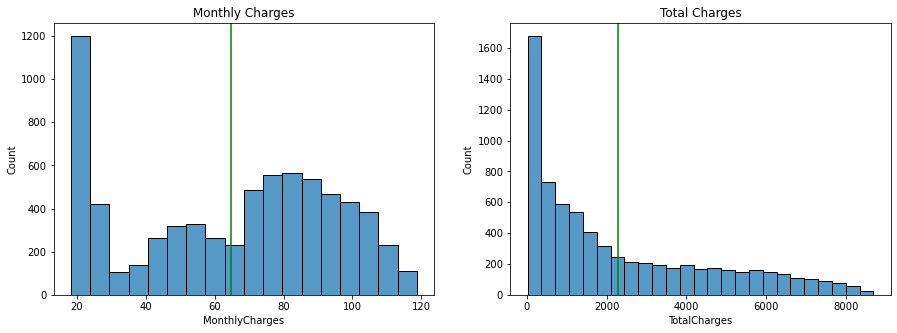

In [94]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='MonthlyCharges')
plt.axvline(x=data.MonthlyCharges.mean(), color='green')
plt.title('Monthly Charges')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='TotalCharges')
plt.axvline(x=data.TotalCharges.mean(), color='green')
plt.title('Total Charges')
plt.show()

- Tagihan perbulan berkisar antara 18 dollar sampai 118 dollar dengan rata-rata tagihan perbulan sebesar 64.76 dollar.
- Tagihan total berkisar antara 18 dollar sampai 8684 dollar dengan rata-rata total tagihan sebesar 2283 dollar.

In [95]:
#menggunakan ordinal encoder karna data tidak bertingkat
encoded = OrdinalEncoder()

#fit dan transform data
data_encoded = encoded.fit_transform(data)

#membuat dataframe
data_encoded_df = pd.DataFrame(data_encoded, columns= data.columns)

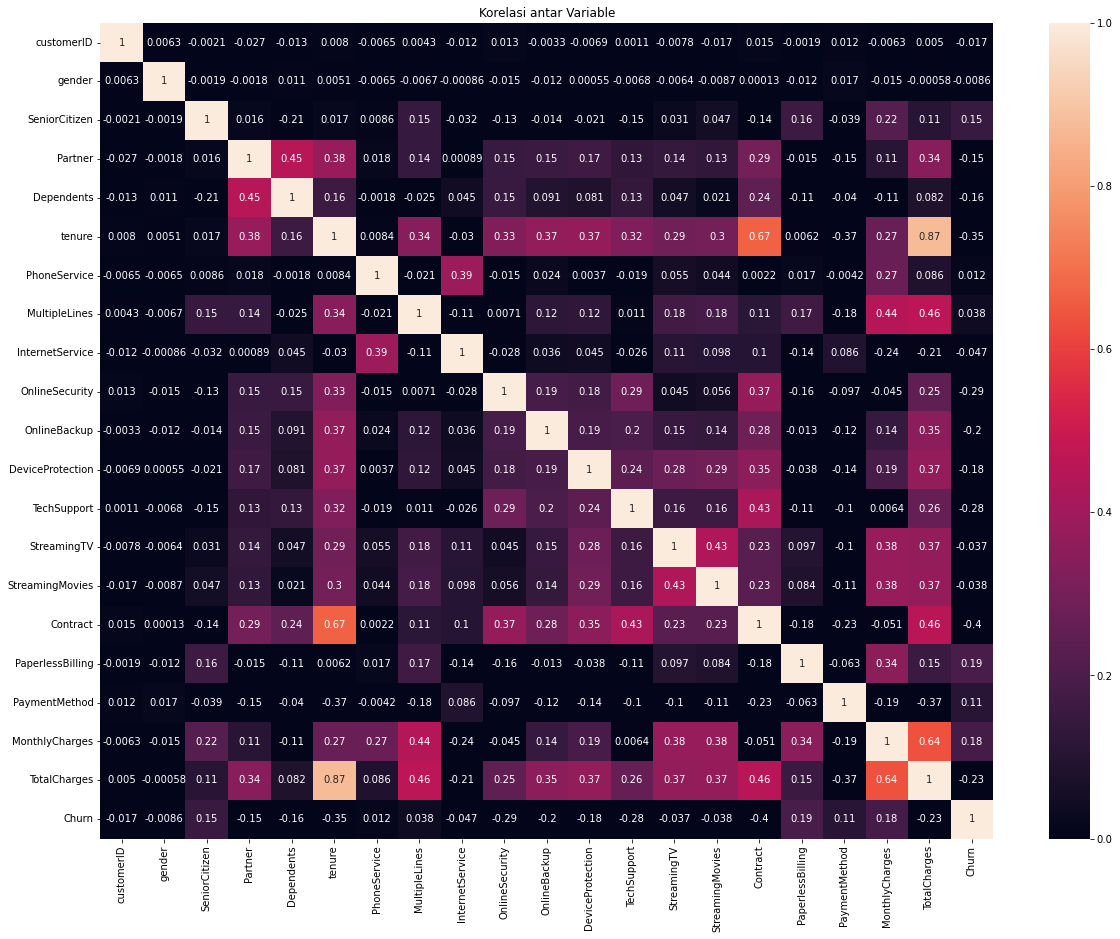

In [96]:
# cek korelasi 
corr = data_encoded_df.corr()

# buat heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antar Variable')
plt.show()

- Terdapat 4 fitur yang memiliki korelasi tertinggi terhadap target yaitu PaperlessBilling, MonthlyCharges, SeniorCitizen dan PaymentMethod
- Fitur Contract dan tenure memiliki korelasi yang tinggi, sehingga harus dipilih salah satu fitur yang digunakan dalam prediksi
- Korelasi tenure, MonthlyCharges dan TotalCharges tinggi, karena semakin lama atau semakin tinggi customer menggunakan layanan maka tagihan yang akan dibayar akan semakin tinggi juga

---
# 5. Data Preprocessing
---

**Data Inference**

In [97]:
#mengambil 100 data inf
data_inf = data.sample(100, random_state=1)

#menghapus data inference dari dataset
data = data.drop(data_inf.index)

#reset index dataset
data.reset_index(drop=True, inplace=True)

#reset index data inference
data_inf.reset_index(drop=True, inplace=True)

In [98]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7994-UYIVZ,Male,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,659.45,No
96,4804-NCPET,Male,0,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,387.40,No
97,0562-FGDCR,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Mailed check,74.55,5430.65,No
98,0428-IKYCP,Male,0,Yes,No,22,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),87.00,1850.65,No


In [99]:
data_inf['Churn'].value_counts()

No     79
Yes    21
Name: Churn, dtype: int64

Target : Terdapat 61 data berlabel `no` dan 39 data berlabel `yes`

**Split Data Train-Test**

In [100]:
#fitur (X)
X = data.drop('Churn', axis=1)

#target (y)
y = data['Churn']

In [101]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=6)

print('Train Size :', X_train.shape)
print('Val Size :', X_val.shape)
print('Test Size :', X_test.shape)

Train Size : (4720, 20)
Val Size : (834, 20)
Test Size : (1389, 20)


Perbandingan umum sebanyak 85:15 diambil, tujuan train-size lebih besar agar data dapat belajar dengan baik. setelah dilakukan pembagian, didapat 4.652 data untuk train, 822 untuk data validasi dan 1.369 untuk test.

**Data Cleaning** - Missing Values

In [102]:
#Memastikan tidak ada missing values pada data
print('X_train :', X_train.isnull().sum().sum())
print('X_test  :', X_test.isnull().sum().sum())
print('X_val   :', X_val.isnull().sum().sum())
print('')
print('y_train :', y_train.isnull().sum().sum())
print('y_test  :', y_test.isnull().sum().sum())
print('y_val   :', y_val.isnull().sum().sum())

X_train : 6
X_test  : 3
X_val   : 2

y_train : 0
y_test  : 0
y_val   : 0


terdapat 11 total missing values pada data fitur (X), 11 data tersebut berada pada kolom `TotalCharges` yang kemungkinan terbaca sebagai missing values setelah data converting dari string ke numerikal. keputusan untuk menangani missing values akan didasarkan pada persebaran kemiringan data, apakah direplace dengan mean atau median.

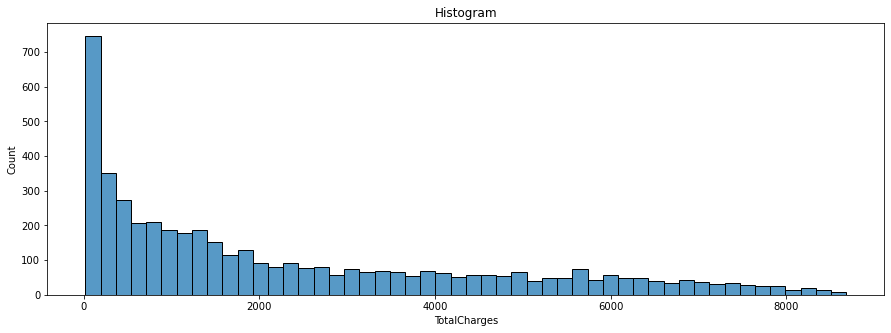

0.9625294651351665

In [103]:
#Histplot untuk Total Charges
plt.figure(figsize=(15, 5))
sns.histplot(X_train['TotalCharges'], bins=50)
plt.title('Histogram')
plt.show()

data.TotalCharges.skew()

Distribusi data merupakan data dengan skewness moderate (right skewed), oleh karena itu akan digunakan median imputation untuk menangani missing values.

In [104]:
# replace missing value TotalCharges
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)

In [105]:
#Memastikan ulang missing values sudah dihandle
print('X_train :', X_train.isnull().sum().sum())
print('X_test  :', X_test.isnull().sum().sum())
print('X_val   :', X_val.isnull().sum().sum())
print('')
print('y_train :', y_train.isnull().sum().sum())
print('y_test  :', y_test.isnull().sum().sum())
print('y_val   :', y_val.isnull().sum().sum())

X_train : 0
X_test  : 0
X_val   : 0

y_train : 0
y_test  : 0
y_val   : 0


Tidak terdapat adanya missing values pada dataset.

**Data Cleaning** - Outlier Handling

In [106]:
#fungsi pemanggilan boxplot
def box(data, variable1, variable2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[variable1])
    plt.title(variable1)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable2])
    plt.title(variable2)
    
    plt.show()

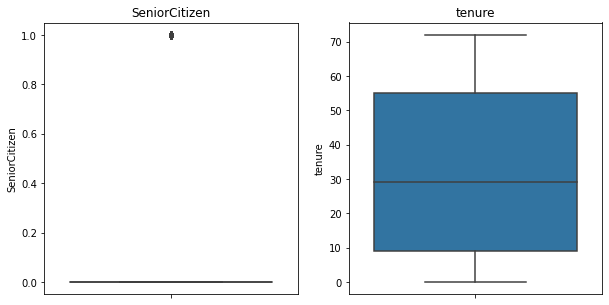

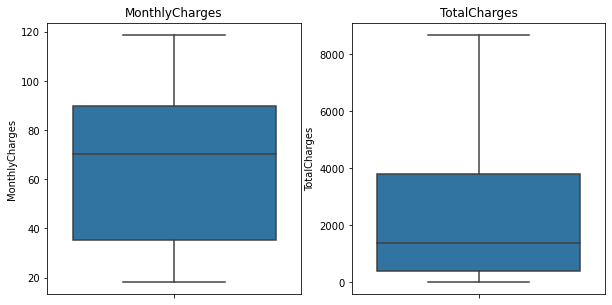

In [107]:
box(data, 'SeniorCitizen', 'tenure')
box(data, 'MonthlyCharges', 'TotalCharges')

Tidak terdapat adanya outlier menurut visualisasi boxplot pada `tenure`, `Monthly Charges`, dan `Total Charges`.
Pada kolom `Senior Citizen` bukan merupakan outliers, tetapi data tersebut merupakan fitur yang termasuk kategori tetapi dalam bentuk numerik

**Feature Selection**

Semua fitur akan digunakan terkecuali customerID dengan alasan bahwa ID tidak mempengaruhi churn dan berbeda antar 1 orang dan lainnya.

In [108]:
X_train.drop(columns=['customerID'], axis=1, inplace=True)
X_val.drop(columns=['customerID'], axis=1, inplace=True)
X_test.drop(columns=['customerID'], axis=1, inplace=True)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
181,Male,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),84.50,662.65
5746,Male,0,Yes,Yes,31,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,59.95,1848.80
483,Male,1,Yes,No,61,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60
1921,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,5099.15
3791,Female,0,Yes,Yes,8,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.45,411.75


**Split Numerical Column & Categorical Column**

In [109]:
num_cols_norm = ['tenure', 'MonthlyCharges']
num_cols_skew = ['TotalCharges']
cat_pass = ['SeniorCitizen']
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

print('Numerical Columns Normal : ', num_cols_norm)
print('Numerical Columns Skewed : ', num_cols_skew)
print('Categorical Columns : ', cat_cols)
print('Categorical Columns Encoded : ', cat_pass)

Numerical Columns Normal :  ['tenure', 'MonthlyCharges']
Numerical Columns Skewed :  ['TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Categorical Columns Encoded :  ['SeniorCitizen']


- Data dengan distribusi skewness normal discaling menggunakan StandardScaler
- Data dengan distibusi skewness tidak normal discaling menggunakan MinMaxScaler
- Data kategorikal di encoding menggunakan OneHotEncoder

**Feature Engineering**

In [110]:
skew_pipe = Pipeline([('skew_scale', MinMaxScaler())])
norm_pipe = Pipeline([('norm_scale', StandardScaler())])
cat_pipe = Pipeline([('encode', OneHotEncoder())])

#pipeline preprocessing
preprocess = ColumnTransformer([
    ('norm', norm_pipe, num_cols_norm),
    ('skew', skew_pipe, num_cols_skew),
    ('cat', cat_pipe, cat_cols),
    ('pass', 'passthrough', cat_pass)])

In [111]:
#fit & transform
X_train = preprocess.fit_transform(X_train)
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)

In [112]:
print('X_Train :', X_train.shape)
print('X_Val   :', X_val.shape)
print('X_Test  :', X_test.shape)

X_Train : (4720, 45)
X_Val   : (834, 45)
X_Test  : (1389, 45)


In [113]:
# Encode the target
labelenc = LabelEncoder()
labelenc.fit(y_train)

LabelEncoder()

In [114]:
#tranform target
y_train_encoded = labelenc.transform(y_train)
y_val_encoded = labelenc.transform(y_val)
y_test_encoded = labelenc.transform(y_test)

In [115]:
#buat dataframe baru
y_train_final = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_val_final = pd.DataFrame(y_val_encoded, columns=['Churn'])
y_test_final = pd.DataFrame(y_test_encoded, columns=['Churn'])

**Pipeline**

In [116]:
#train dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_final))
train_dataset = train_dataset.batch(64)

#val dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_final))
val_dataset = val_dataset.batch(64)

#test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_final))
test_dataset = test_dataset.batch(64)

Digunakan jumlah batch sebanyak 64 batch

---
# 6. Model Definition
---

In [117]:
model_seq = Sequential()
#Hidden layer 1
model_seq.add(Dense(6, activation='relu', input_shape=(45,)))
#Output layer
model_seq.add(Dense(1, activation='sigmoid'))

# Compile
model_seq.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 276       
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


Model sequential baseline digunakan 1 hidden layer dan 6 neural dengan inputnya sebesar 45 feature.
activation umum seperti `relu` dipilih untuk hidden layer dan `sigmoid` untuk output layer.

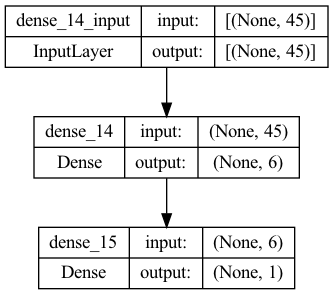

In [118]:
#plot model architecture
tf.keras.utils.plot_model(model_seq, show_shapes=True)

**Functional API**

In [119]:
input_layer = Input(shape=(45,))
hidden_layer = Dense(6, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model_func = Model(inputs=input_layer, outputs=output_layer)

# compile model
model_func.compile(loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])
model_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 276       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


Pada model functional baseline arsitekturnya sama dengan model sequential baseline dimana terdapat 6 neuron dengan input sebesar 45 feature. didapat total parameter sebanyak 283 parameter.

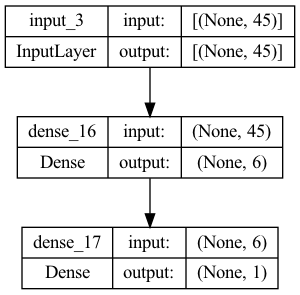

In [120]:
#plot model architecture
tf.keras.utils.plot_model(model_func, show_shapes=True)

---
# 7. Model Training
---

**Sequential API**

In [121]:
#Train model - 64 batch
history_seq = model_seq.fit(train_dataset, validation_data=(val_dataset), epochs=20)

Epoch 1/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.6309 - val_loss: 0.5989 - val_accuracy: 0.7254
Epoch 2/20
74/74 [==============================] - 0s 867us/step - loss: 0.5118 - accuracy: 0.7504 - val_loss: 0.4646 - val_accuracy: 0.7878
Epoch 3/20
74/74 [==============================] - 0s 841us/step - loss: 0.4461 - accuracy: 0.7786 - val_loss: 0.4358 - val_accuracy: 0.7986
Epoch 4/20
74/74 [==============================] - 0s 848us/step - loss: 0.4309 - accuracy: 0.7919 - val_loss: 0.4279 - val_accuracy: 0.8022
Epoch 5/20
74/74 [==============================] - 0s 837us/step - loss: 0.4240 - accuracy: 0.7943 - val_loss: 0.4246 - val_accuracy: 0.8070
Epoch 6/20
74/74 [==============================] - 0s 861us/step - loss: 0.4200 - accuracy: 0.7960 - val_loss: 0.4231 - val_accuracy: 0.8106
Epoch 7/20
74/74 [==============================] - 0s 851us/step - loss: 0.4174 - accuracy: 0.7994 - val_loss: 0.4224 - val_accuracy: 0.8082
Epoch 8/

**Functional API**

In [122]:
#Train model - 64 batch
history_func = model_func.fit(train_dataset, validation_data=(val_dataset), epochs=20)

Epoch 1/20
74/74 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7415 - val_loss: 0.5269 - val_accuracy: 0.7434
Epoch 2/20
74/74 [==============================] - 0s 878us/step - loss: 0.4769 - accuracy: 0.7767 - val_loss: 0.4556 - val_accuracy: 0.7962
Epoch 3/20
74/74 [==============================] - 0s 848us/step - loss: 0.4392 - accuracy: 0.7930 - val_loss: 0.4349 - val_accuracy: 0.7998
Epoch 4/20
74/74 [==============================] - 0s 844us/step - loss: 0.4275 - accuracy: 0.7983 - val_loss: 0.4273 - val_accuracy: 0.8082
Epoch 5/20
74/74 [==============================] - 0s 895us/step - loss: 0.4224 - accuracy: 0.7979 - val_loss: 0.4238 - val_accuracy: 0.8070
Epoch 6/20
74/74 [==============================] - 0s 846us/step - loss: 0.4196 - accuracy: 0.7979 - val_loss: 0.4218 - val_accuracy: 0.8106
Epoch 7/20
74/74 [==============================] - 0s 816us/step - loss: 0.4179 - accuracy: 0.7983 - val_loss: 0.4207 - val_accuracy: 0.8106
Epoch 8/

---
# 8. Model Evaluation
---

**Sequential API**

In [123]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.696609,0.630932,0.598940,0.725420
1,0.511810,0.750424,0.464569,0.787770
2,0.446143,0.778602,0.435830,0.798561
3,0.430857,0.791949,0.427873,0.802158
4,0.424043,0.794280,0.424561,0.806954
5,0.419990,0.795975,0.423138,0.810552
6,0.417366,0.799364,0.422353,0.808153
7,0.415413,0.801695,0.421795,0.809353
8,0.413947,0.804025,0.421420,0.811751
9,0.412836,0.803178,0.421196,0.811751


--------------- accuracy ---------------


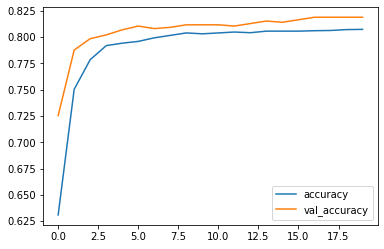

--------------- loss ---------------


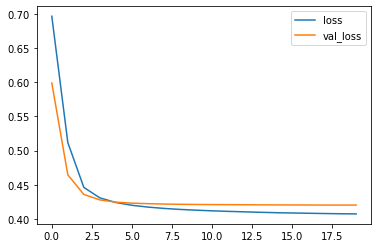

In [124]:
# Plot loss
print('-'*15,'accuracy','-'*15)
history_seq_df[['accuracy', 'val_accuracy']].plot()
plt.show()
print('-'*15,'loss','-'*15)
history_seq_df[['loss', 'val_loss']].plot()
plt.show()

Pada 20 epochs yang digunakan, val accuracy meningkat dari epochs 1 ke epochs 20, selain itu dari visual dapat dikatakan bahwa antar accuracy dan loss, gapnya tidak besar.

In [125]:
# Model evaluation using clasification report

y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

44/44 [==============================] - 0s 473us/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1004
           1       0.68      0.59      0.63       385

    accuracy                           0.81      1389
   macro avg       0.76      0.74      0.75      1389
weighted avg       0.80      0.81      0.81      1389



- Precision : Dari 1004 customer yang tidak churn, kita berhasil mengklasifikasikan 86% customer benar tidak churn dan dan salah mengklasifikasikan 14% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
- Recall : Jadi dari 1004 customer yang tidak churn, kita berhasil mengklasifikasikan 88% customer benar tidak churn dan salah mengklasifikasikan 12% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.

**Functional API**

In [126]:
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.587787,0.741525,0.526946,0.743405
1,0.476931,0.776695,0.455642,0.796163
2,0.439234,0.793008,0.434916,0.799760
3,0.427505,0.798305,0.427326,0.808153
4,0.422423,0.797881,0.423785,0.806954
5,0.419590,0.797881,0.421802,0.810552
6,0.417876,0.798305,0.420656,0.810552
7,0.416738,0.800212,0.419960,0.809353
8,0.415875,0.800636,0.419636,0.809353
9,0.415224,0.801059,0.419235,0.811751


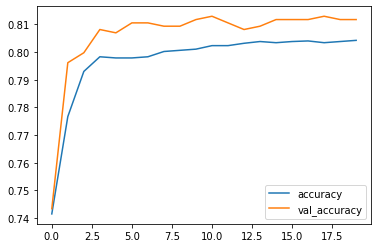

In [127]:
# Plot accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()
plt.show()

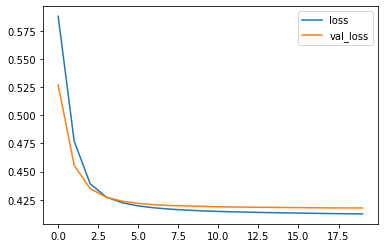

In [128]:
# Plotloss

history_func_df[['loss', 'val_loss']].plot()
plt.show()

Pada 20 epochs yang digunakan, val accuracy meningkat dari epochs 1 ke epochs 20, selain itu dari visual dapat dikatakan bahwa antar accuracy dan loss, gapnya tidak besar, justru pada functional API, gapnya sangat tipis jika dibandingkan dengan sequential API.

In [129]:
# Model evaluation using clasification report

y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

44/44 [==============================] - 0s 428us/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1004
           1       0.66      0.59      0.63       385

    accuracy                           0.80      1389
   macro avg       0.76      0.74      0.75      1389
weighted avg       0.80      0.80      0.80      1389



- Precision : Dari 1004 customer yang tidak churn, kita berhasil mengklasifikasikan 87% customer benar tidak churn dan dan salah mengklasifikasikan 13% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
- Recall : Jadi dari 1004 customer yang tidak churn, kita berhasil mengklasifikasikan 89% customer benar tidak churn dan salah mengklasifikasikan 11% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.
- Pada dasarnya, terdapat peningkatan 1% pada precision dan recall pada functional API

**Tuning** - Sequential API

In [130]:
model_seq_2 = Sequential()

#hidden layer 1
model_seq_2.add(Dense(32, activation='relu', input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=50)))
#hidden layer 2
model_seq_2.add(Dense(16, activation='relu')) 
#hidden layer 3
model_seq_2.add(Dense(8, activation='relu')) 
#hidden layer 4
model_seq_2.add(Dense(4, activation='relu')) 
#output layer
model_seq_2.add(Dense(1, activation='sigmoid')) 

model_seq_2.compile(loss='binary_crossentropy',
    optimizer='nadam',
    metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                1472      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


Model Improvement:
- Pada model sequential di atas dilakukan improvement dengan menambahkan jumlah `hidden layer` dan juga jumlah `neuron` pada hidden layernya. 
- Optimizer diubah dari `adam` menjadi `nadam`. 
- Jumlah parameter yang sebelumnya `283` menjadi `2.177`
- Peningkatan jumlah `epochs` yang sebelumnya hanya 20

In [131]:
history_seq_2 = model_seq_2.fit(train_dataset, validation_data=(val_dataset), epochs=50)

Epoch 1/50
74/74 [==============================] - 1s 2ms/step - loss: 0.4759 - accuracy: 0.7481 - val_loss: 0.4434 - val_accuracy: 0.7806
Epoch 2/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7911 - val_loss: 0.4360 - val_accuracy: 0.8094
Epoch 3/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7996 - val_loss: 0.4332 - val_accuracy: 0.8129
Epoch 4/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8015 - val_loss: 0.4311 - val_accuracy: 0.8153
Epoch 5/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8021 - val_loss: 0.4306 - val_accuracy: 0.8106
Epoch 6/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8066 - val_loss: 0.4294 - val_accuracy: 0.8118
Epoch 7/50
74/74 [==============================] - 0s 988us/step - loss: 0.4155 - accuracy: 0.8068 - val_loss: 0.4285 - val_accuracy: 0.8058
Epoch 8/50
74/74 [

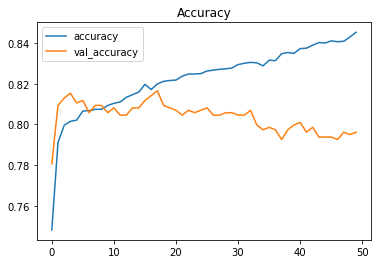

In [132]:
history_seq_2_df = pd.DataFrame(history_seq_2.history)

history_seq_2_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.show()

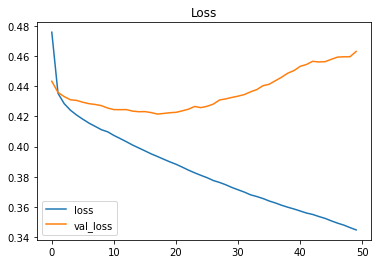

In [133]:
history_seq_2_df[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

Jika dibandingkan secara visual, model sebelum dilakukan tuning (baseline) lebih baik dibandingkan setelah dilakukan improvement, selain itu gap yang didapat juga relatif lebih tinggi pada model improvement.

In [134]:
# Model evaluation using clasification report

y_pred_seq_2 = model_seq_2.predict(X_test)
y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print('===Baseline===')
print(classification_report(y_test_final, y_pred_seq))
print('===Model Tuning===')
print(classification_report(y_test_final, y_pred_seq_2))

44/44 [==============================] - 0s 453us/step
===Baseline===
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1004
           1       0.68      0.59      0.63       385

    accuracy                           0.81      1389
   macro avg       0.76      0.74      0.75      1389
weighted avg       0.80      0.81      0.81      1389

===Model Tuning===
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1004
           1       0.64      0.56      0.59       385

    accuracy                           0.79      1389
   macro avg       0.74      0.72      0.73      1389
weighted avg       0.78      0.79      0.78      1389



Secara akurasi, model baseline dan setelah tuning sama saja, jika dilihat dari recall, model setelah tuning mendapatkan skor yang lebih tinggi pada label 0, namun secara keseluruhan jika dilihat dari macro average, model baseline lebih baik dibandingkan dengan model improvement

**Tuning** - Functional API

In [135]:
input_layer = Input(shape=(45,))
hidden_layer1 = Dense(32, activation='relu')(input_layer)
hidden_layer2 = Dense(16, activation='relu')(hidden_layer1) 
hidden_layer3 = Dense(8, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(4, activation='relu')(hidden_layer3) 
output_layer = Dense(1, activation='sigmoid')(hidden_layer4)

model = Model(inputs=input_layer, outputs=output_layer)

#compile
model.compile(loss='binary_crossentropy',
    optimizer='nadam',
    metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_23 (Dense)            (None, 32)                1472      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable p

Model Improvement:
- Pada model sequential di atas dilakukan improvement dengan menambahkan jumlah `hidden layer` dan juga jumlah `neuron` pada hidden layernya. 
- Optimizer diubah dari `adam` menjadi `nadam`. 
- Jumlah parameter yang sebelumnya `283` menjadi `2.177`
- Peningkatan jumlah `epochs` yang sebelumnya hanya 20

In [136]:
history_func_2 = model.fit(train_dataset, validation_data=(val_dataset), epochs=50)

Epoch 1/50
74/74 [==============================] - 1s 2ms/step - loss: 0.5109 - accuracy: 0.7352 - val_loss: 0.4551 - val_accuracy: 0.7254
Epoch 2/50
74/74 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7521 - val_loss: 0.4392 - val_accuracy: 0.8141
Epoch 3/50
74/74 [==============================] - 0s 972us/step - loss: 0.4274 - accuracy: 0.7936 - val_loss: 0.4361 - val_accuracy: 0.8106
Epoch 4/50
74/74 [==============================] - 0s 953us/step - loss: 0.4227 - accuracy: 0.7981 - val_loss: 0.4339 - val_accuracy: 0.8094
Epoch 5/50
74/74 [==============================] - 0s 962us/step - loss: 0.4197 - accuracy: 0.7989 - val_loss: 0.4322 - val_accuracy: 0.8034
Epoch 6/50
74/74 [==============================] - 0s 956us/step - loss: 0.4168 - accuracy: 0.8015 - val_loss: 0.4306 - val_accuracy: 0.8106
Epoch 7/50
74/74 [==============================] - 0s 956us/step - loss: 0.4144 - accuracy: 0.8044 - val_loss: 0.4293 - val_accuracy: 0.8141
Epoch 8/50

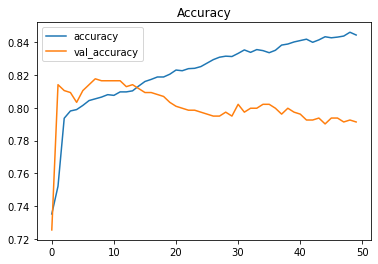

In [137]:
history_func_2_df = pd.DataFrame(history_func_2.history)

history_func_2_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.show()


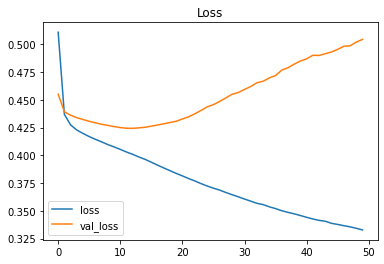

In [138]:
history_func_2_df[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

Jika dibandingkan secara visual, model sebelum dilakukan tuning (baseline) lebih baik dibandingkan setelah dilakukan improvement, selain itu gap yang didapat juga relatif lebih tinggi pada model improvement.

In [139]:
# Model evaluation using clasification report

y_pred_func_2 = model.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

print('===Baseline===')
print(classification_report(y_test_final, y_pred_func))
print('===Model Improvement===')
print(classification_report(y_test_final, y_pred_func_2))

44/44 [==============================] - 0s 460us/step
===Baseline===
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1004
           1       0.66      0.59      0.63       385

    accuracy                           0.80      1389
   macro avg       0.76      0.74      0.75      1389
weighted avg       0.80      0.80      0.80      1389

===Model Improvement===
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1004
           1       0.60      0.57      0.58       385

    accuracy                           0.77      1389
   macro avg       0.72      0.71      0.71      1389
weighted avg       0.77      0.77      0.77      1389



Secara akurasi, model baseline lebih baik daripada setelah tuning, jika dilihat dari recall, model setelah tuning dan baseline sama saja, namun secara keseluruhan jika dilihat dari macro average, model baseline lebih baik dibandingkan dengan model improvement

---
# 9. Model Inference
---

In [140]:
# Memilih fitur yang akan digunakan
data_inf.drop(columns=['customerID'], axis=1, inplace=True)

In [141]:
# Menggunakan preproccess pipeline pada data inf

data_inf_final = preprocess.transform(data_inf)

In [142]:
# Melakukan encode pada target data inf
data_inf_target = labelenc.transform(data_inf['Churn'])

In [143]:
# melakukan predict pada inference set
y_pred_inf = model.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5, 'Yes', 'No')

4/4 [==============================] - 0s 727us/step


In [144]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Functional Prediction'])

In [145]:
pred_inf = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
pred_inf

,Churn,Functional Prediction
0,No,No
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
95,No,Yes
96,No,No
97,No,No
98,No,Yes


In [146]:
print('data inf  :')
print(pred_inf['Churn'].value_counts())
print('data pred :')
print(pred_inf['Functional Prediction'].value_counts())

data inf  :
No     79
Yes    21
Name: Churn, dtype: int64
data pred :
No     74
Yes    26
Name: Functional Prediction, dtype: int64


In [147]:
print('----Inference Set----')
print(classification_report(data_inf['Churn'], y_pred_inf_df))

----Inference Set----
              precision    recall  f1-score   support

          No       0.91      0.85      0.88        79
         Yes       0.54      0.67      0.60        21

    accuracy                           0.81       100
   macro avg       0.72      0.76      0.74       100
weighted avg       0.83      0.81      0.82       100



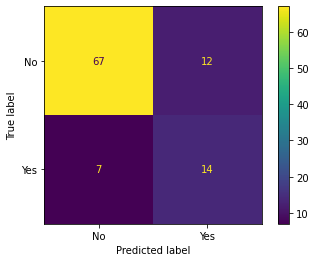

In [148]:
ConfusionMatrixDisplay.from_predictions(data_inf['Churn'], y_pred_inf_df)
plt.show()

- Dengan akurasi sebesar 85% dan macro average sebesar 78%, hasil inference memprediksi data dengan label `No` sebanyak 78 data dan label `Yes` sebanyak 22 data dari 100 data.

---
# 10. Model Saving
---

In [153]:
#save pipeline
with open('preprocess.pkl', 'wb') as file_1:
    joblib.dump(preprocess, file_1)

---
# 11. Kesimpulan
---

Dataset diambil dari kaggle merupakan dataset customer PT Telco (Perusahaan Layanan Jasa) :
- Tidak terdapat adanya missing values sebelum data di convert, namun setelah diconvert terdapat beberapa missing values yang akhirnya di ganti dengan median.
- Persebaran antara jumlah laki- laki dan perempuan hampir setara, begitu pula dengan persebaran customer yang memiliki pasangan/ tidak.
- Kebanyakan pengguna Telco merupakan customer usia muda (dibawah 65 tahun).
- hampir seluruh customer PT Telco adalah pengguna layanan telfon PT Telco pula
- Target (Churn) tidak seimbang, namun tidak dilakukan balance handling karena hanya fokus pada customer berlabel `No` agar perusahaan lebih fokus untuk mempertahankan customer.
- Dari hasil akhir classification report, model baseline mempunyai skor akurasi lebih baik dibandingkan dengan model improvement.
- Pada model inference, didapat data pada label `No` sebanyak 81 dan `Yes` sebanyak 19 data yang mana pada dataset aslinya, data `No` sebanyak 79 dan `Yes` sebanyak 21 data.